In [6]:
import pandas as pd


In [7]:
mnt=pd.read_csv(r"D:\data_sets\maintenance_data (1).csv")
mnt

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
0,56,0,92.178854,104.230204,96.517159,TeamA,Provider4
1,81,1,72.075938,103.065701,87.271062,TeamC,Provider4
2,60,0,96.272254,77.801376,112.196170,TeamA,Provider1
3,86,1,94.406461,108.493608,72.025374,TeamC,Provider2
4,34,0,97.752899,99.413492,103.756271,TeamB,Provider1
...,...,...,...,...,...,...,...
995,88,1,88.589759,112.167556,99.861456,TeamB,Provider4
996,88,1,116.727075,110.871332,95.075631,TeamA,Provider4
997,22,0,104.026778,88.212873,83.221220,TeamB,Provider1
998,78,0,104.911649,104.257296,83.421491,TeamA,Provider4


In [8]:
cor=mnt.corr()
cor

ValueError: could not convert string to float: 'TeamA'

# encoding

1. label encoding

2. one hot encoding

 # label encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
mnt.team=le.fit_transform(mnt.team)
mnt.provider=le.fit_transform(mnt.provider)

In [15]:
mnt.team.unique()

array([0, 2, 1], dtype=int64)

In [16]:
le.inverse_transform([0,2,1])

array(['Provider1', 'Provider3', 'Provider2'], dtype=object)

In [18]:
mnt.provider.unique()

array([3, 0, 1, 2])

In [19]:
le.inverse_transform([3, 0, 1, 2])

array(['Provider4', 'Provider1', 'Provider2', 'Provider3'], dtype=object)

In [22]:
cor=mnt.corr()

In [23]:
cor

,lifetime,broken,pressureInd,moistureInd,temperatureInd,team,provider
lifetime,1.000000,0.702656,0.000943,0.001196,0.001744,-0.046537,-0.025172
broken,0.702656,1.000000,-0.028942,-0.019520,0.015364,0.030876,-0.062972
pressureInd,0.000943,-0.028942,1.000000,0.020543,0.003641,-0.069528,-0.004337
moistureInd,0.001196,-0.019520,0.020543,1.000000,-0.009842,0.022420,0.028906
temperatureInd,0.001744,0.015364,0.003641,-0.009842,1.000000,0.007310,-0.010822
team,-0.046537,0.030876,-0.069528,0.022420,0.007310,1.000000,0.005606
provider,-0.025172,-0.062972,-0.004337,0.028906,-0.010822,0.005606,1.000000


In [24]:
import seaborn as sns


<Axes: >

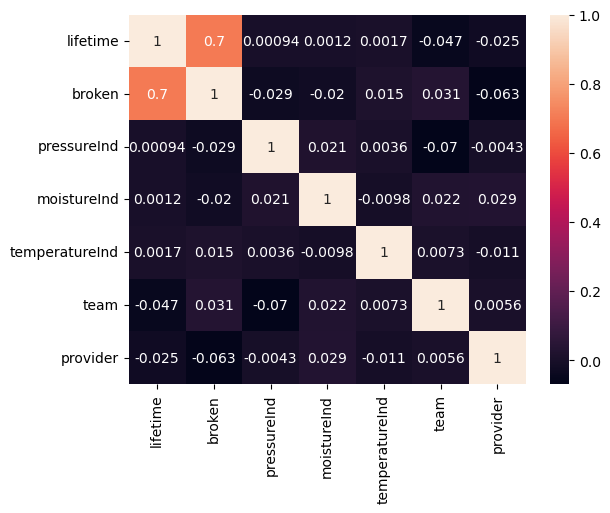

In [26]:
sns.heatmap(cor,annot=True)

# ip/ op creation

In [27]:
ip=mnt.drop("broken",axis=1)
op=mnt.broken

In [28]:
ip

,lifetime,pressureInd,moistureInd,temperatureInd,team,provider
0,56,92.178854,104.230204,96.517159,0,3
1,81,72.075938,103.065701,87.271062,2,3
2,60,96.272254,77.801376,112.196170,0,0
3,86,94.406461,108.493608,72.025374,2,1
4,34,97.752899,99.413492,103.756271,1,0
...,...,...,...,...,...,...
995,88,88.589759,112.167556,99.861456,1,3
996,88,116.727075,110.871332,95.075631,0,3
997,22,104.026778,88.212873,83.221220,1,0
998,78,104.911649,104.257296,83.421491,0,3


In [29]:
op

0      0
1      1
2      0
3      1
4      0
      ..
995    1
996    1
997    0
998    0
999    0
Name: broken, Length: 1000, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(ip,op,test_size=0.2)

In [50]:
x_train


array([[ 0.94208919, -0.14740419, -0.40531632, -0.82372509, -1.2241414 ,
        -1.30825733],
       [-0.37795772,  2.38427165, -0.02346768,  0.3150284 ,  1.28691788,
         1.38224617],
       [-1.32084836, -1.2786235 ,  2.50537858,  1.45760832,  0.03138824,
         0.48541167],
       ...,
       [ 0.45178605, -0.83518769, -1.03463508,  0.09862729, -1.2241414 ,
         1.38224617],
       [-0.49110459,  0.8856076 , -0.58417431, -0.01663698,  1.28691788,
         1.38224617],
       [-1.73572025,  0.72870421,  0.90862208,  0.47156365,  1.28691788,
         0.48541167]])

In [51]:
y_train

499    1
333    0
59     0
220    0
243    0
      ..
13     1
387    0
753    0
729    0
156    0
Name: broken, Length: 800, dtype: int64

In [52]:
x_test

array([[-0.98711307,  0.46742978,  0.06397176, -1.03158825, -1.16554303,
         0.47214436],
       [ 1.10988264, -0.24577415,  0.32484656,  1.10024321,  1.26267162,
        -0.44464081],
       [ 0.84299227, -0.65976938,  0.58232193, -0.18167012,  0.04856429,
        -1.36142598],
       ...,
       [ 0.34733874, -1.02564298, -0.50110198,  0.59253366,  0.04856429,
         0.47214436],
       [ 1.22426422,  1.46910987, -0.79558545,  0.25213821, -1.16554303,
         1.38892954],
       [-1.82591135, -1.07063992, -0.39497278, -1.13967446,  1.26267162,
         0.47214436]])

In [53]:
y_test

357    0
777    1
901    0
262    0
671    0
      ..
101    0
917    1
734    1
116    1
525    0
Name: broken, Length: 200, dtype: int64

In [41]:
len(y_test)

200

In [55]:
from sklearn.preprocessing import StandardScaler 

In [56]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [57]:
x_train

array([[ 0.94208919, -0.14740419, -0.40531632, -0.82372509, -1.2241414 ,
        -1.30825733],
       [-0.37795772,  2.38427165, -0.02346768,  0.3150284 ,  1.28691788,
         1.38224617],
       [-1.32084836, -1.2786235 ,  2.50537858,  1.45760832,  0.03138824,
         0.48541167],
       ...,
       [ 0.45178605, -0.83518769, -1.03463508,  0.09862729, -1.2241414 ,
         1.38224617],
       [-0.49110459,  0.8856076 , -0.58417431, -0.01663698,  1.28691788,
         1.38224617],
       [-1.73572025,  0.72870421,  0.90862208,  0.47156365,  1.28691788,
         0.48541167]])

In [58]:
x_test

array([[-0.98711307,  0.46742978,  0.06397176, -1.03158825, -1.16554303,
         0.47214436],
       [ 1.10988264, -0.24577415,  0.32484656,  1.10024321,  1.26267162,
        -0.44464081],
       [ 0.84299227, -0.65976938,  0.58232193, -0.18167012,  0.04856429,
        -1.36142598],
       ...,
       [ 0.34733874, -1.02564298, -0.50110198,  0.59253366,  0.04856429,
         0.47214436],
       [ 1.22426422,  1.46910987, -0.79558545,  0.25213821, -1.16554303,
         1.38892954],
       [-1.82591135, -1.07063992, -0.39497278, -1.13967446,  1.26267162,
         0.47214436]])

# logistic regression

it uses sigmoid function

the slope of the sigmoid curve is S shape

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [61]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [62]:
y_test

357    0
777    1
901    0
262    0
671    0
      ..
101    0
917    1
734    1
116    1
525    0
Name: broken, Length: 200, dtype: int64

In [67]:
df=pd.DataFrame({'y_test(original_answer)':list(y_test),
                 'y_pred(machine_generate answer)':list(y_pred)
                })
df

,y_test(original_answer),y_pred(machine_generate answer)
0,0,0
1,1,1
2,0,1
3,0,1
4,0,0
...,...,...
195,0,0
196,1,0
197,1,0
198,1,1



# confusion matrix

In [ ]:
- it is used to measure the performance of a classification model

-  a confusion matrix plots a table of all predicted and actual

In [64]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [65]:
acc=accuracy_score(y_pred,y_test)
pre=precision_score(y_pred,y_test)
rec=recall_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)

In [66]:
print("ACCURACY",acc)
print('PRECISION',pre)
print('recall',rec)
print('f1_score',f1)

ACCURACY 0.815
PRECISION 0.8
recall 0.7317073170731707
f1_score 0.7643312101910829


In [68]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [69]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[103,  15],
       [ 22,  60]], dtype=int64)

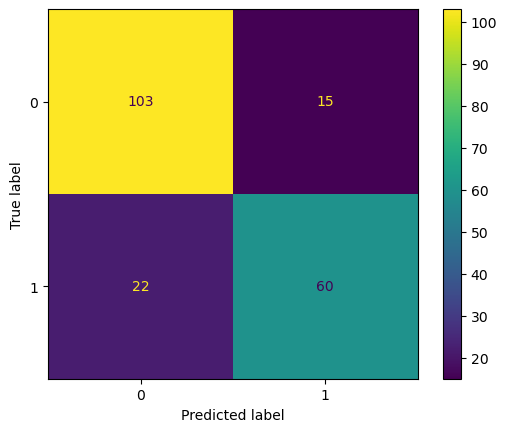

In [73]:


cmd=ConfusionMatrixDisplay(cm)
cmd.plot()
